In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
df=df.dropna(axis=0)
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [3]:
rows, column = df.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 90 rows and 7 columns.


In [4]:
print('The data type of each attribute: \n')
df.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


In [6]:
print('Duplicated rows: ', df[df.duplicated()].shape[0])

Duplicated rows:  0


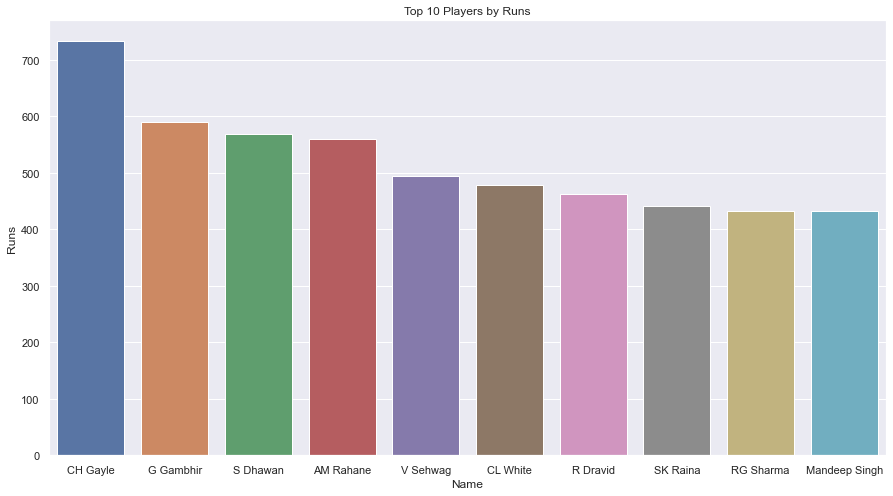

In [7]:
plt.figure(figsize=(15,8))
ba1=df.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
ba1= ba1.reset_index() 
ba1.columns = ['Name' ,'Runs']
sns.barplot(data= ba1 , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

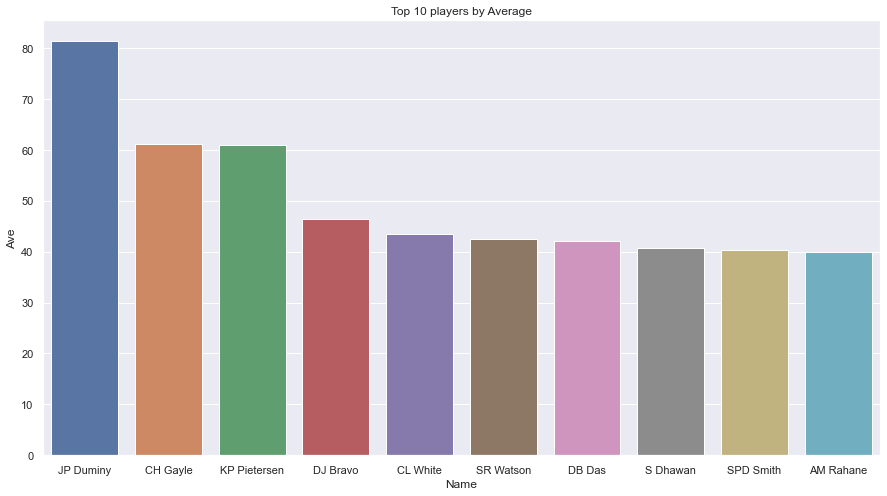

In [8]:
plt.figure(figsize=(15,8))
ba1=df.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
ba1= ba1.reset_index() 
ba1.columns = ['Name' ,'Ave']
sns.barplot(data= ba1 , x= 'Name' , y ='Ave')
plt.title("Top 10 players by Average");

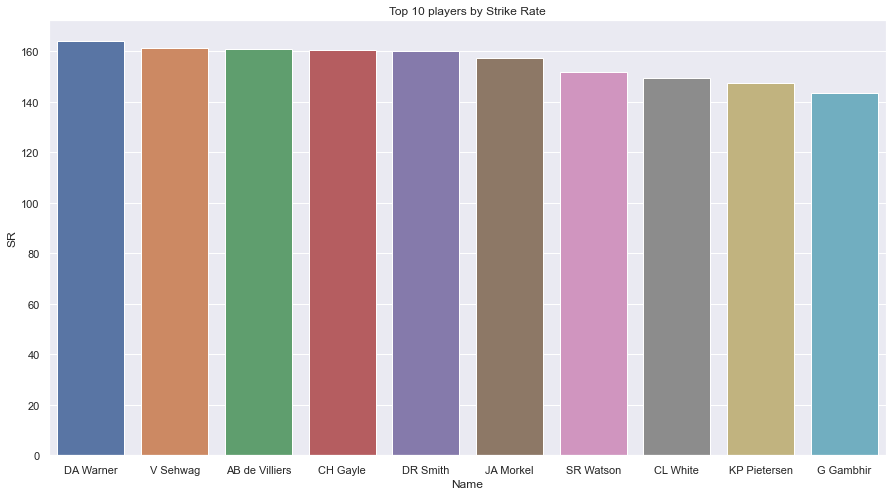

In [9]:
plt.figure(figsize=(15,8))
ba1=df.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
ba1= ba1.reset_index() 
ba1.columns = ['Name' ,'SR']
sns.barplot(data= ba1 , x= 'Name' , y ='SR')
plt.title("Top 10 players by Strike Rate");

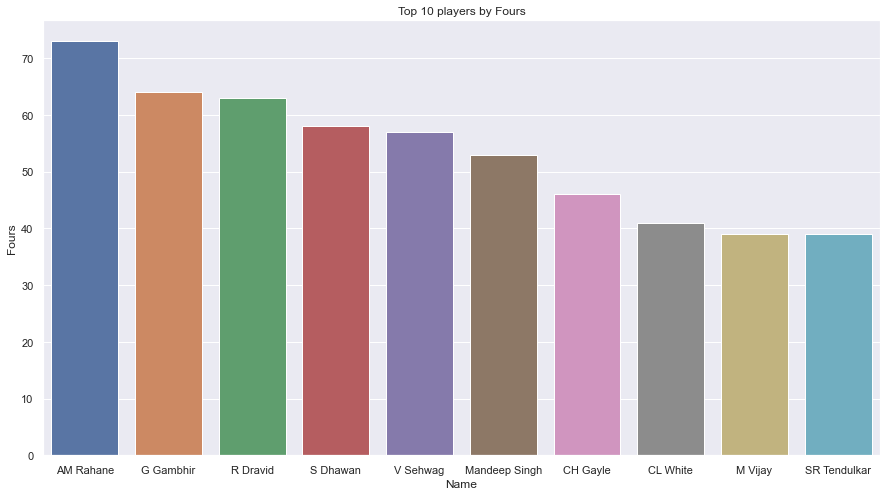

In [10]:
plt.figure(figsize=(15,8))
ba1=df.groupby('Name')['Fours'].sum().sort_values(ascending = False ).head(10)
ba1= ba1.reset_index() 
ba1.columns = ['Name' ,'Fours']
sns.barplot(data= ba1 , x= 'Name' , y ='Fours')
plt.title("Top 10 players by Fours");

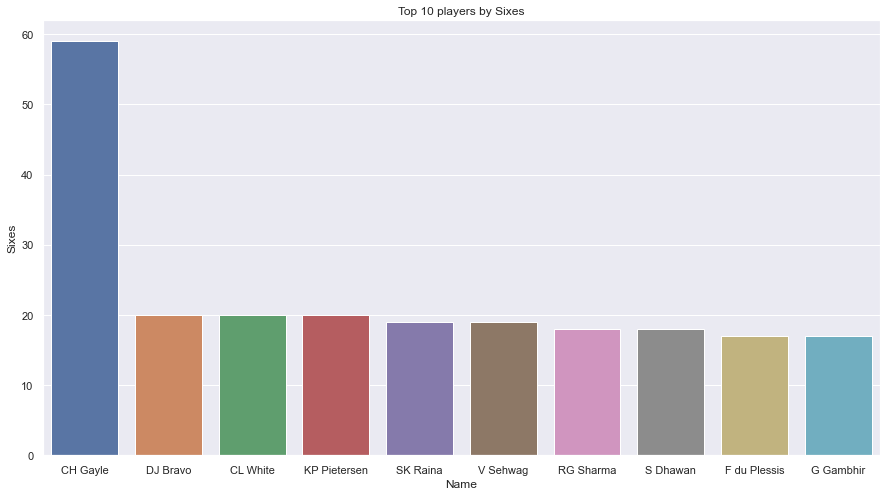

In [11]:
plt.figure(figsize=(15,8))
ba1=df.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
ba1= ba1.reset_index() 
ba1.columns = ['Name' ,'Sixes']
sns.barplot(data= ba1 , x= 'Name' , y ='Sixes')
plt.title("Top 10 players by Sixes");

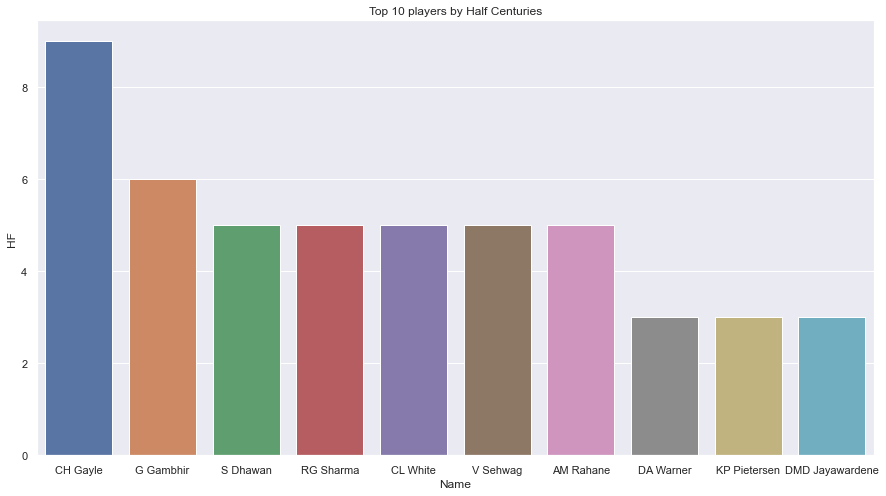

In [12]:
plt.figure(figsize=(15,8))
ba1=df.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
ba1= ba1.reset_index() 
ba1.columns = ['Name' ,'HF']
sns.barplot(data= ba1 , x= 'Name' , y ='HF')
plt.title("Top 10 players by Half Centuries");

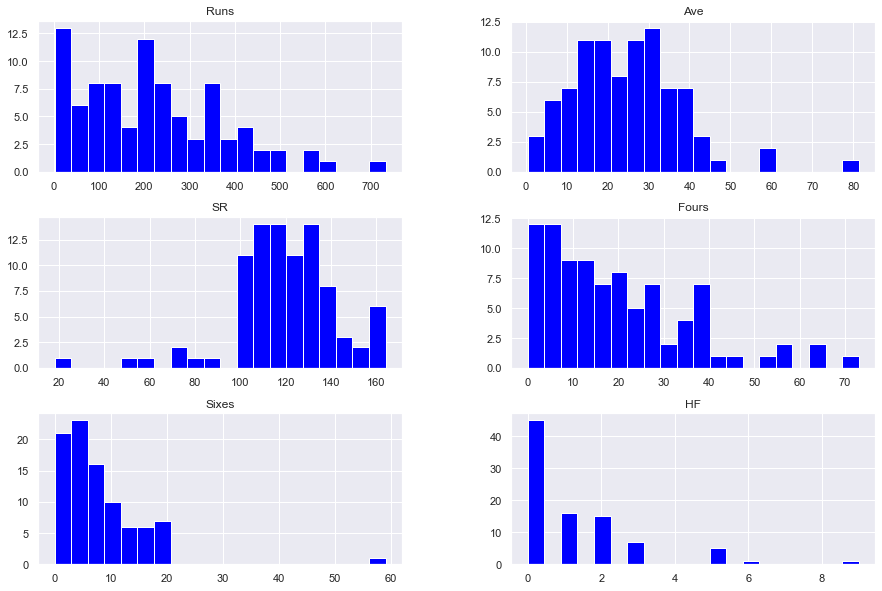

In [13]:
df.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

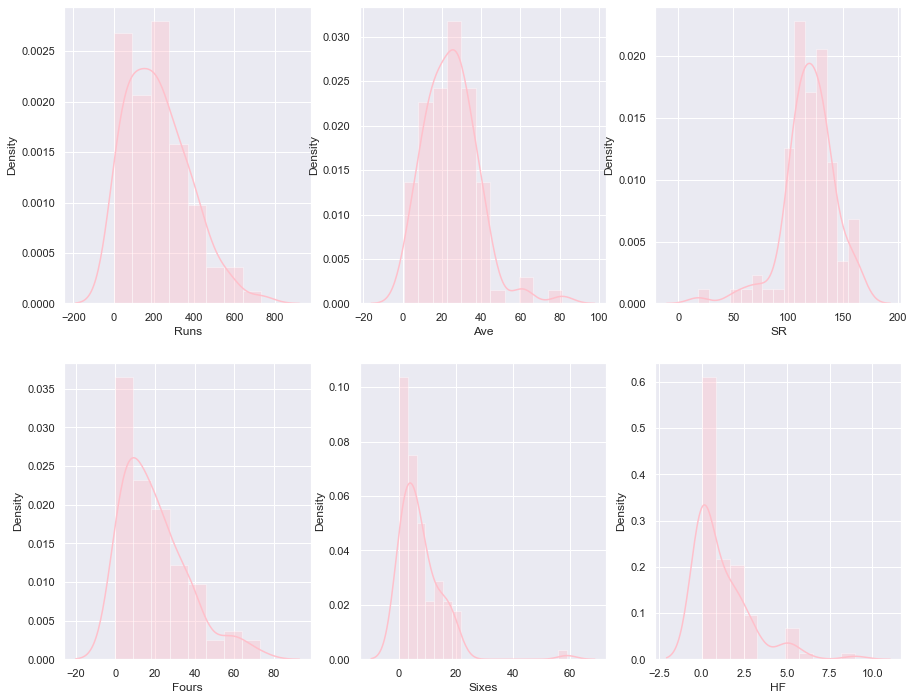

In [14]:
plt.figure(figsize=(15, 12))
col = 1
for i in df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.distplot(df[i], color = 'pink')
    col += 1 

Strike rate, fours, sixes and half centuries have a skewed distribution

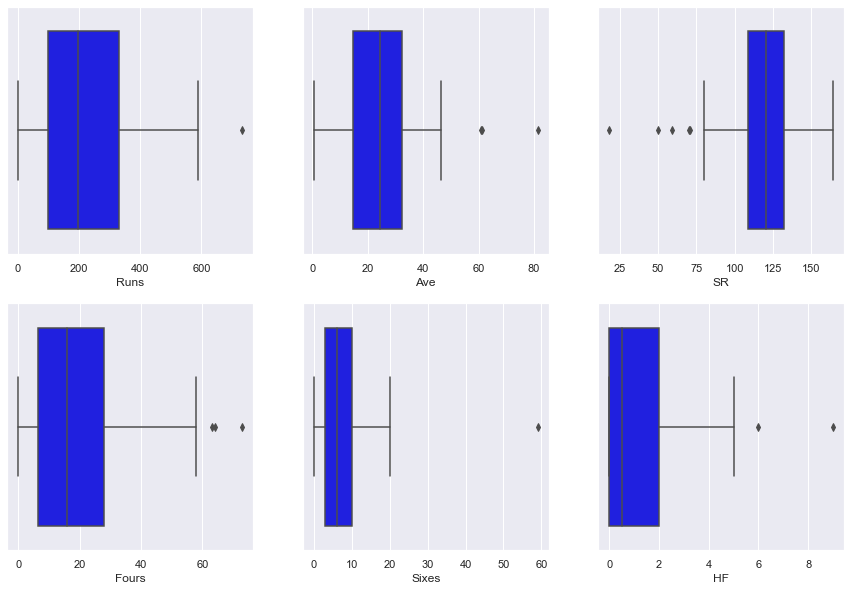

In [15]:
plt.figure(figsize=(15, 10))
col = 1
for i in df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(df[i],color='blue')
    col += 1

There appears to be outliers, will not be treating them as its highly likely that these are genuine observation

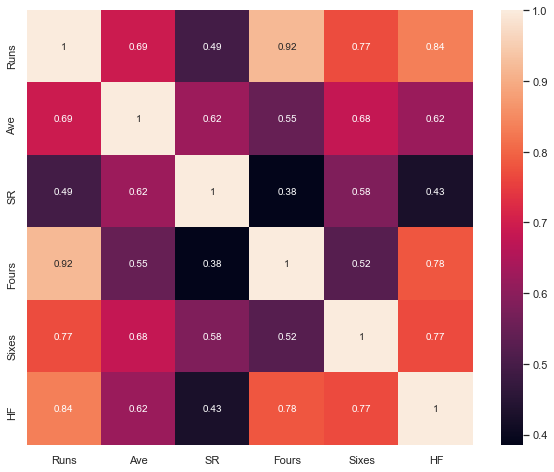

In [16]:
plt.figure(figsize=(10,8))
corr=df.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

All the variable except fours with strike rate, strike rate with half centuries,strike rate with runs, have high correlation

In [17]:
aa = df.iloc[:,1:7] 
aa1 = aa.apply(zscore)
aa1.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [18]:
wss =[] 
for i in range(1,6):
    KM = KMeans(n_clusters=i)
    KM.fit(aa1)
    wss.append(KM.inertia_)
wss

[540.0000000000001,
 296.26135354732025,
 223.36518460916952,
 178.1750796759041,
 148.61257456074287]

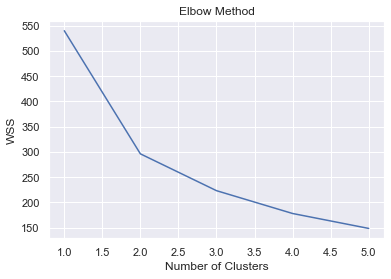

In [19]:
plt.plot(range(1,6), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [20]:
k_means = KMeans(n_clusters = 2)
k_means.fit(aa1)
labels = k_means.labels_

In [21]:
# Calculating silhouette_score
silhouette_score(aa1,labels)

0.41111085574076756

In [22]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}
silhouette_coefficients = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(aa1)
    score = silhouette_score(aa1,kmeans.labels_)
    silhouette_coefficients.append(score)   

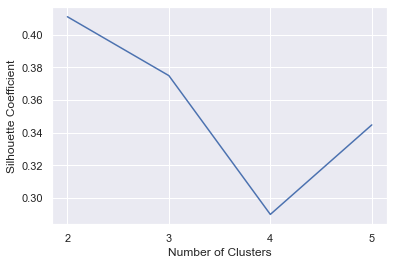

In [23]:
plt.plot(range(2,6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [24]:
df['cluster']=labels
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [25]:
df.cluster.value_counts().sort_index()

0    55
1    35
Name: cluster, dtype: int64

In [26]:
aggdata=df.iloc[:,0:9].groupby('cluster').mean()
aggdata['Freq']=df.cluster.value_counts().sort_index()
aggdata

,Runs,Ave,SR,Fours,Sixes,HF,Freq
cluster,,,,,,,
0,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182,55
1,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286,35


In [27]:
df['cluster'] = df['cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [28]:
Grade_A = df[df['cluster'] == 'Grade A']
Grade_A.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade A
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,Grade A
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,Grade A
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,Grade A
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,Grade A
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Grade A


In [29]:
Grade_B = df[df['cluster'] == 'Grade B']
Grade_B.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Grade B
73,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Grade B
75,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Grade B
77,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Grade B
79,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Grade B
